# Palindrome Numbers

In [1]:
from dataset import PalindromeDataset
from vanilla_rnn import VanillaRNN
from lstm import LSTM
import torch
import train
import json
import glob
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt


class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)
    def __str__(self):
        return json.dumps(self.__dict__, indent=4)
    
% matplotlib inline

## Inspecting Model Predictions

In [2]:
model_path = 'models/RNN.20/'
rnn = {
    'hp': json.loads(open(model_path + 'hyperparams.txt', 'r').read()),
    'cp': torch.load(open(model_path + 'checkpoint.pth.tar', 'rb'), map_location='cpu')
}
dataset = PalindromeDataset(rnn['hp']['input_length'] + 1, 1, 1)
loader = torch.utils.data.DataLoader(dataset)
RNN = VanillaRNN(rnn['hp']['input_length'], 
                 rnn['hp']['input_dim'],
                 rnn['hp']['num_hidden'],
                 rnn['hp']['num_classes'],
                 rnn['hp']['batch_size'],
                 torch.device('cpu'))
RNN.load_state_dict(rnn['cp']['state_dict'])
ld = iter(loader)
x, t = ld.next()
y = RNN(x)
x, torch.argmax(y, 1), t

(tensor([[9., 9., 7., 7., 9., 4., 9., 3., 6., 8., 8., 6., 3., 9., 4., 9., 7., 7.,
          9.]]), tensor([9]), tensor([9]))

## Visualising Training

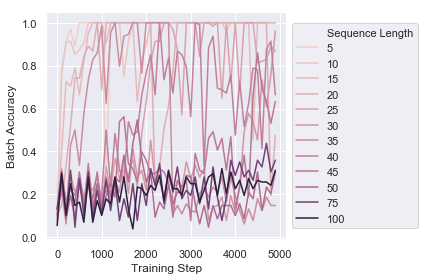

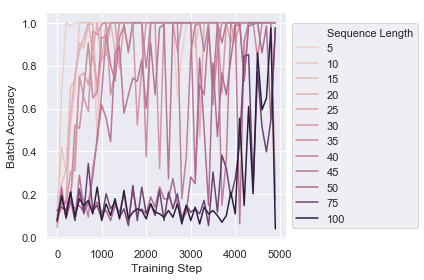

In [26]:
# load all statistics into dataframes
model_paths = glob.glob('./models/*')
dfs = []
for model_path in model_paths:
    with open(model_path + '/' + 'hyperparams.txt', 'r', encoding='utf-8') as file:
        model = json.load(file)

        stats = pd.read_csv(model_path + '/' + 'stats.csv')
        stats.columns = ['Training Step', 'Batch Loss', 'Batch Accuracy']
        stats['Model'] = model['model_type']
        stats['Sequence Length'] = model['input_length'] + 1
        
        dfs.append(stats)

# concatenate all dataframes for seaborn plotting
df = pd.concat(dfs, ignore_index=True)

# plot accuracy over training steps for different sequence length
plt.figure()
sns.lineplot(x='Training Step', y='Batch Accuracy', hue='Sequence Length', data=df[df['Model'] == 'RNN'], ci=None, legend='full')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('figures/rnn_seq_acc.png', dpi=160)

plt.figure()
sns.lineplot(x='Training Step', y='Batch Accuracy', hue='Sequence Length', data=df[df['Model'] == 'LSTM'], ci=None, legend='full')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('figures/lstm_seq_acc.png', dpi=160)


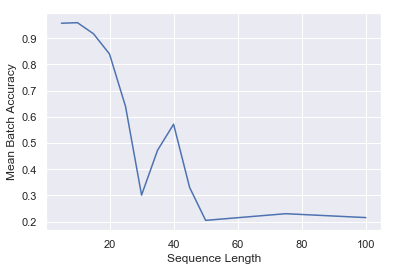

In [27]:
# plot average accuracy over sequence length for RNN
df_mean = df.groupby(['Model', 'Sequence Length']).mean().reset_index()
df_mean.columns = ['Model', 'Sequence Length', 'Mean Training Step', 'Mean Batch Loss', 'Mean Batch Accuracy']
df_mean
plt.figure()
sns.lineplot(x='Sequence Length', y='Mean Batch Accuracy', data=df_mean[df_mean['Model'] == 'RNN'], legend='full')
plt.savefig('figures/rnn_full_mean_acc_over_seq_len.png', dpi=160)

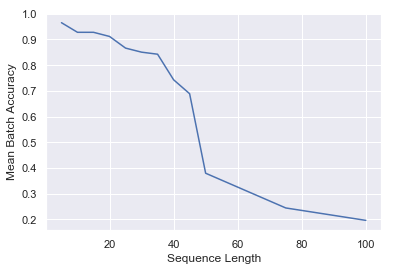

In [28]:
# plot average accuracy over sequence length for LSTM
df_mean = df.groupby(['Model', 'Sequence Length']).mean().reset_index()
df_mean.columns = ['Model', 'Sequence Length', 'Mean Training Step', 'Mean Batch Loss', 'Mean Batch Accuracy']
df_mean
plt.figure()
sns.lineplot(x='Sequence Length', y='Mean Batch Accuracy', data=df_mean[df_mean['Model'] == 'LSTM'], legend='full')
plt.savefig('figures/lstm_full_mean_acc_over_seq_len.png', dpi=160)

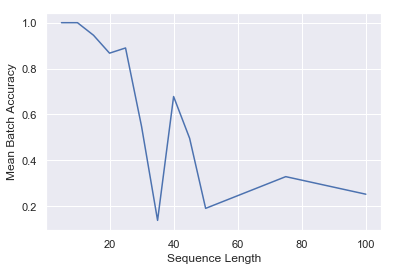

In [29]:
# plot last average accuracy over sequence length for LSTM
df_mean = df[df['Training Step'] >= 4000].groupby(['Model', 'Sequence Length']).mean().reset_index()
df_mean.columns = ['Model', 'Sequence Length', 'Mean Training Step', 'Mean Batch Loss', 'Mean Batch Accuracy']
df_mean
plt.figure()
sns.lineplot(x='Sequence Length', y='Mean Batch Accuracy', data=df_mean[df_mean['Model'] == 'RNN'], legend='full')
plt.savefig('figures/rnn_end_mean_acc_over_seq_len.png', dpi=160)

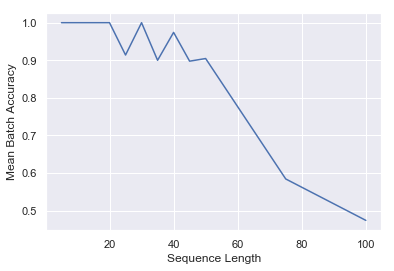

In [33]:
# plot last average accuracy over sequence length for LSTM
df_mean = df[df['Training Step'] >= 4000].groupby(['Model', 'Sequence Length']).mean().reset_index()
df_mean.columns = ['Model', 'Sequence Length', 'Mean Training Step', 'Mean Batch Loss', 'Mean Batch Accuracy']
df_mean
plt.figure()
sns.lineplot(x='Sequence Length', y='Mean Batch Accuracy', data=df_mean[df_mean['Model'] == 'LSTM'], legend='full')
plt.savefig('figures/lstm_end_mean_acc_over_seq_len.png', dpi=160)

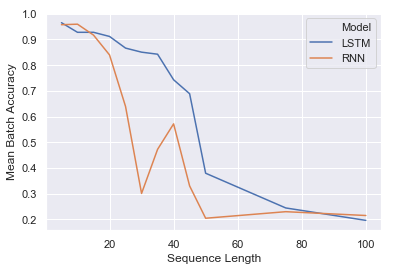

In [31]:
# plot comparison of mean batch accuracy over entire training procedure
df_mean = df.groupby(['Model', 'Sequence Length']).mean().reset_index()
df_mean.columns = ['Model', 'Sequence Length', 'Mean Training Step', 'Mean Batch Loss', 'Mean Batch Accuracy']
df_mean
plt.figure()
sns.lineplot(x='Sequence Length', y='Mean Batch Accuracy', data=df_mean, hue='Model', legend='full')
plt.savefig('figures/comp_full_mean_acc_over_seq_len.png', dpi=160)

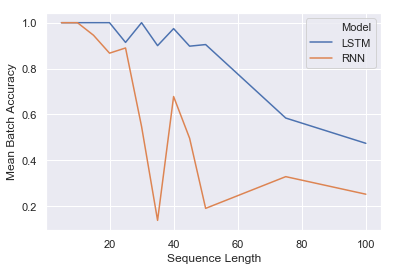

In [34]:
# plot comparison of last average accuracy over sequence length
df_mean = df[df['Training Step'] >= 4000].groupby(['Model', 'Sequence Length']).mean().reset_index()
df_mean.columns = ['Model', 'Sequence Length', 'Mean Training Step', 'Mean Batch Loss', 'Mean Batch Accuracy']
df_mean
plt.figure()
sns.lineplot(x='Sequence Length', y='Mean Batch Accuracy', data=df_mean, hue='Model', legend='full')
plt.savefig('figures/comp_end_mean_acc_over_seq_len.png', dpi=160)